# Experimento 4: Dataset real (Kaggle) sem remoção de outliers

Neste notebook, foi utilizado o dataset real "Limite de Crédito Bancário" com 10.127 registros. O foco foi treinar modelos diretamente após o tratamento de variáveis categóricas, **sem remoção de outliers**.

## Resultados:
- Regressão Linear:  
  - MSE: 45.46  
  - RMSE: 6.74  
  - MAE: 4.81  
  - R²: 0.4509

- Árvore de Regressão:  
  - MSE: 40.74  
  - RMSE: 6.38  
  - MAE: 4.26  
  - R²: 0.5079

- KNN Regressor:  
  - MSE: 60.33  
  - RMSE: 7.77  
  - MAE: 5.25  
  - R²: 0.2711

- Random Forest:  
  - MSE: 34.01  
  - RMSE: 5.83  
  - MAE: 3.82  
  - R²: 0.5892

> Conclusão: Os modelos apresentam desempenho moderado. A Random Forest obteve os melhores resultados. A presença de outliers não comprometeu fortemente a performance.


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [75]:
df = pd.read_csv ('~/Documents/Regressao_credito/credito.csv')

In [76]:
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,na,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,na,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [78]:
df.describe()

# Média e desvio padrão → indicam centralidade e dispersão.

# Mínimo e máximo → destacam possíveis outliers.

#dados parecem bem distribuídos com relação a valores máx, médias e desvio padrão.

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [79]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['limite_credito'] = df['limite_credito'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [80]:
# Especificando as colunas de interesse
colunas_interesse = ['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']

# Iterar pelas colunas e exibir a contagem de categorias para cada uma
for col in colunas_interesse:
    print(f"\nColuna: {col}")
    print(df[col].value_counts())


Coluna: sexo
sexo
F    5358
M    4769
Name: count, dtype: int64

Coluna: escolaridade
escolaridade
mestrado               3128
ensino medio           2013
na                     1519
sem educacao formal    1487
graduacao              1013
doutorado               967
Name: count, dtype: int64

Coluna: estado_civil
estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64

Coluna: salario_anual
salario_anual
menos que $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
na                1112
$120K +            727
Name: count, dtype: int64

Coluna: tipo_cartao
tipo_cartao
blue        9436
silver       555
gold         116
platinum      20
Name: count, dtype: int64


In [81]:
# 1. Verificando os valores únicos da coluna 'salario_anual' para garantir que estão corretos
print(df['salario_anual'].unique())

# 2. Convertendo para string e removendo espaços extras
df['salario_anual'] = df['salario_anual'].astype(str).str.strip()

# 3. Criando o dicionário de mapeamento para a coluna salario_anual
salario_mapping = {
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'menos que $40K': 0,
    'na': -1  # Tratando valores ausentes
}

# Aplicando o mapeamento
df['salario_anual'] = df['salario_anual'].map(salario_mapping)

# Verificando novamente para garantir que o mapeamento ocorreu corretamente
print(df['salario_anual'].unique())

['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'na']
[ 2  0  3  1  4 -1]


In [82]:
# 2. Aplicando One-Hot Encoding para as variáveis sem hierarquia
df = pd.get_dummies(df, columns=['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao'], drop_first=True)

In [83]:
df.head()

,id,default,idade,dependentes,salario_anual,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,...,escolaridade_graduacao,escolaridade_mestrado,escolaridade_na,escolaridade_sem educacao formal,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,tipo_cartao_gold,tipo_cartao_platinum,tipo_cartao_silver
0,768805383,0,45,3,2,39,5,3,1,12.69151,...,False,False,False,False,False,False,False,False,False,False
1,818770008,0,49,5,0,44,6,2,1,8.25696,...,False,True,False,False,False,False,True,False,False,False
2,713982108,0,51,3,3,36,4,0,1,3.41856,...,False,True,False,False,False,False,False,False,False,False
3,769911858,0,40,4,0,34,3,1,4,3.31303,...,False,False,False,False,False,True,False,False,False,False
4,709106358,0,40,3,2,21,5,0,1,4.71622,...,False,False,False,True,False,False,False,False,False,False


# Distribuição das variáveis numéricas

- Distribuições normais/truncadas (como renda_mensal, score_credito) favorecem regressão linear, pois geram relações mais suaves.

- Distribuições enviesadas (como tempo_emprego e valor_aprovado) podem indicar a necessidade de transformação logarítmica.

- Contagem de categorias (tipo_cliente) revela desequilíbrio entre classes. Por exemplo, muitos clientes PF e poucos PJ — você pode querer fazer encoding com cuidado ou considerar análise estratificada depois.

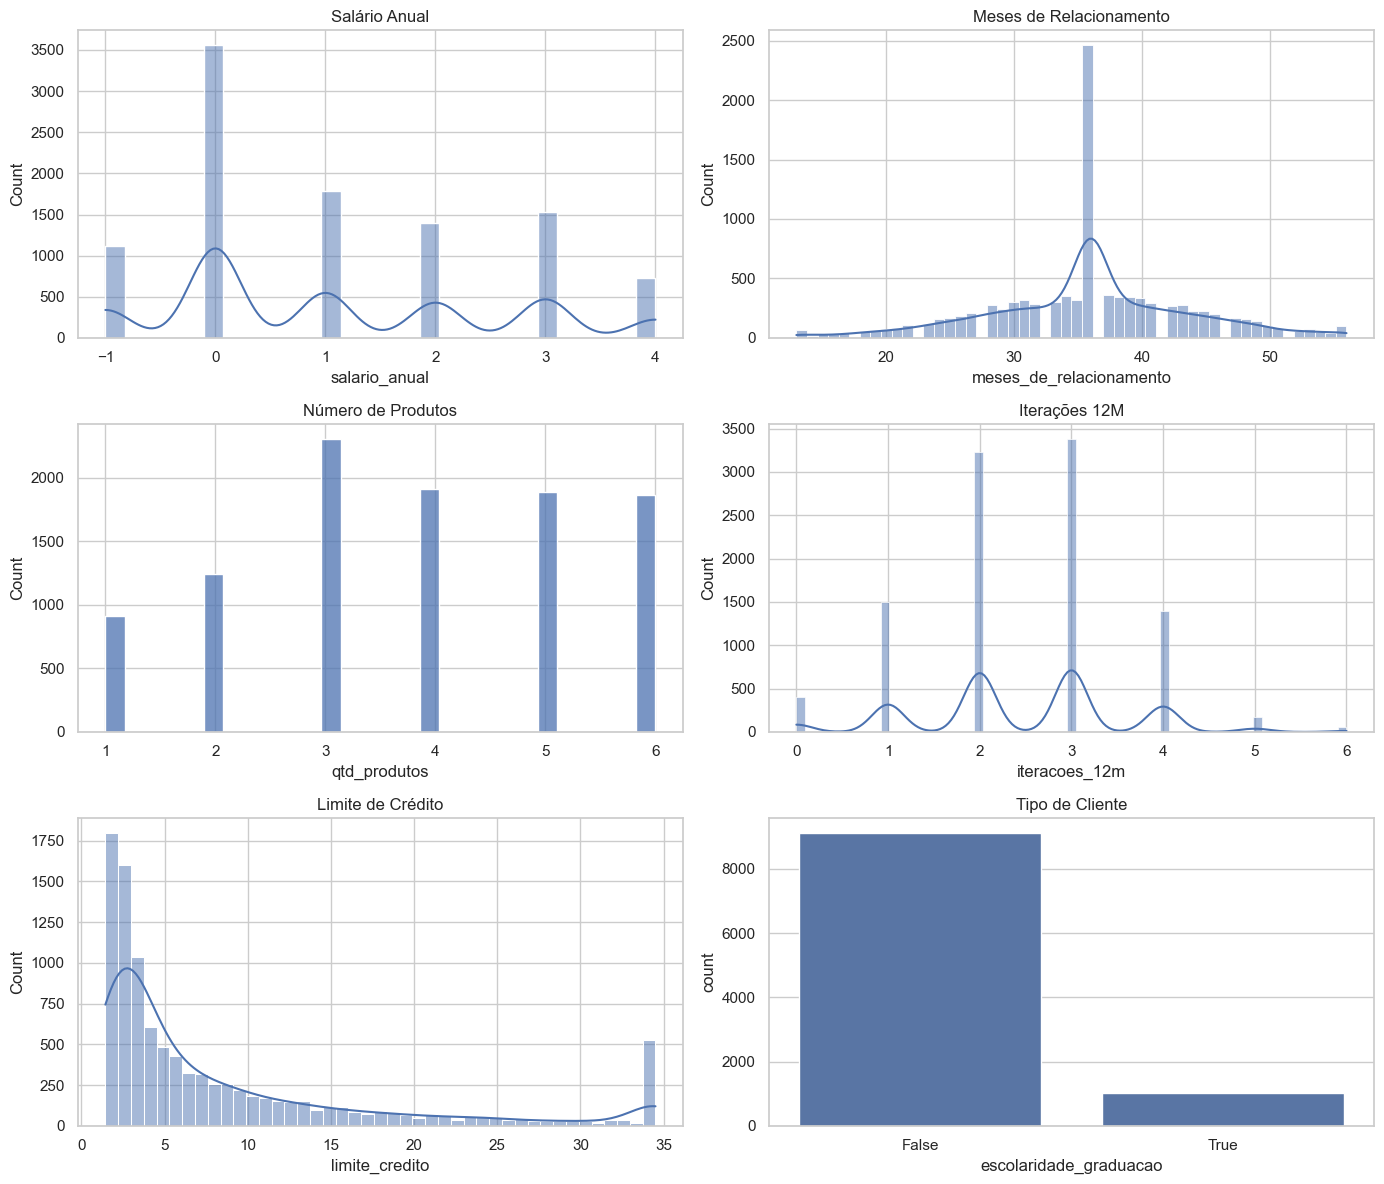

In [84]:

# Ajustando o estilo dos gráficos
sns.set(style='whitegrid')

# Criando a figura com subgráficos
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Substituindo as variáveis contínuas pelo seu dataset
sns.histplot(df['salario_anual'], kde=True, ax=axs[0, 0]).set_title("Salário Anual")
sns.histplot(df['meses_de_relacionamento'], kde=True, ax=axs[0, 1]).set_title("Meses de Relacionamento")
sns.histplot(df['qtd_produtos'], kde=False, ax=axs[1, 0]).set_title("Número de Produtos")
sns.histplot(df['iteracoes_12m'], kde=True, ax=axs[1, 1]).set_title("Iterações 12M")
sns.histplot(df['limite_credito'], kde=True, ax=axs[2, 0]).set_title("Limite de Crédito")

# Para variáveis categóricas, usamos um countplot
sns.countplot(x='escolaridade_graduacao', data=df, ax=axs[2, 1]).set_title("Tipo de Cliente")

# Ajustando a disposição dos subgráficos
plt.tight_layout()
plt.show()


Correlação entre variáveis numéricas

Os valores vão de -1 a 1:

Próximo de 1: forte correlação positiva.

Próximo de -1: forte correlação negativa.

Próximo de 0: sem correlação linear.

Procuramos variáveis com alta correlação com o target (valor_aprovado) para priorizar na modelagem: num produtos, inadimplente passado, renda_mensal

Importante evitar multicolinearidade entre as variáveis, que pode atrapalhar a regressão linear: não identifiquei

In [85]:
correlacoes = df.corr(method='pearson')['limite_credito'].sort_values(ascending=False)
print(correlacoes)

limite_credito                      1.000000
salario_anual                       0.475973
tipo_cartao_silver                  0.441029
sexo_M                              0.420807
tipo_cartao_gold                    0.234331
tipo_cartao_platinum                0.105976
qtd_transacoes_12m                  0.075927
dependentes                         0.068064
estado_civil_solteiro               0.032309
estado_civil_na                     0.025291
estado_civil_divorciado             0.022578
iteracoes_12m                       0.020817
escolaridade_sem educacao formal    0.012213
meses_de_relacionamento             0.007507
id                                  0.005707
idade                               0.002476
escolaridade_graduacao              0.001929
escolaridade_ensino medio          -0.001432
escolaridade_mestrado              -0.004844
escolaridade_na                    -0.006478
valor_transacoes_12m               -0.015502
meses_inativo_12m                  -0.020394
default   

# Análise de dispersão

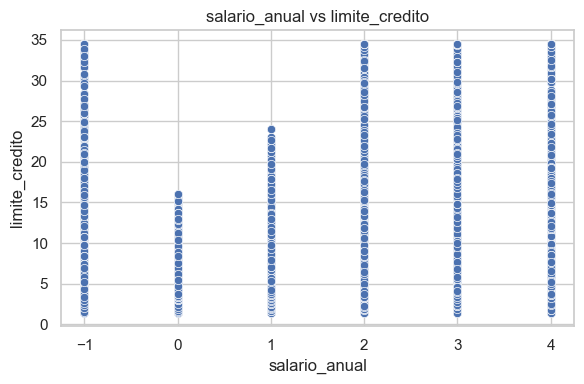

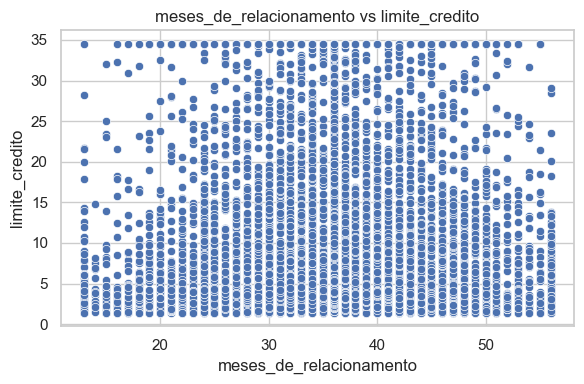

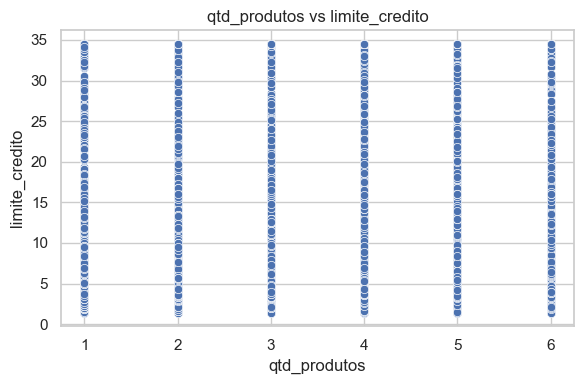

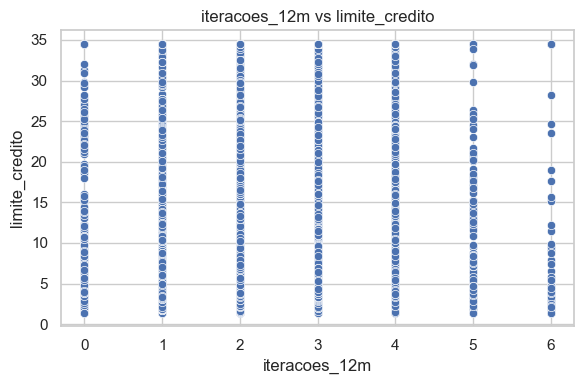

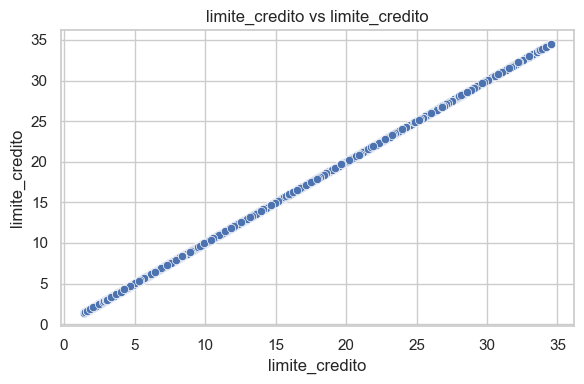

In [86]:
# Plotando os scatterplots
for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='limite_credito')
    plt.title(f'{col} vs limite_credito')
    plt.xlabel(col)
    plt.ylabel('limite_credito')
    plt.tight_layout()
    plt.show()

# Split de dados - Originais

In [87]:
X = df.drop(columns=['limite_credito']) 
#X = df[['sexo_M','salario_anual', 'tipo_cartao_silver', 'tipo_cartao_gold']]

y = df['limite_credito']


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
#escalonamento dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Treinamento e Avaliação

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Previsões
y_pred = lr.predict(X_test)

In [91]:
# Regressão Linear 
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 45.4566577070916
RMSE: 6.742155271653983
MAE: 4.805922509121272
R²: 0.45085325794742626


# Treinamento outros Algoritmos

In [92]:
# Árvore de Regressão
tree = DecisionTreeRegressor(max_depth=25, min_samples_leaf=200,random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [93]:
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("R²:", r2_score(y_test, y_pred_tree))

MSE: 40.73853481902988
RMSE: 6.38267458194681
MAE: 4.257960827990411
R²: 0.5078513291491848


In [94]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=1000, weights= 'distance') # metric ='euclidean', 'manhattan', 'minkowski'
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [95]:
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("R²:", r2_score(y_test, y_pred_knn))

MSE: 60.334655166141005
RMSE: 7.7675385526008816
MAE: 5.245225510197964
R²: 0.27111712588180736


In [96]:
# Criando e treinando o modelo Random Forest
rf = RandomForestRegressor(n_estimators=1000, max_depth =7, random_state=42)
rf.fit(X_train, y_train)
# Fazendo previsões
y_pred_rf = rf.predict(X_test)


In [97]:

# Calculando as métricas
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

MSE: 34.008315010312096
RMSE: 5.831664857509568
MAE: 3.824519372780755
R²: 0.5891568731042671
